In [304]:
import time
import numpy as np
import scipy
import scipy.optimize as opt
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [85]:
def MichaelisMenten(t, y, params):
    S = params['S_0'] - y
    dP_dt = ( (params['k_cat'] * params['E_0']) * S ) / ( params['K_M'] + S )
    return dP_dt

In [86]:
def solve_MichaelisMenten(params):
    # we need to use lambda function if we want to pass some parameters
    solution = solve_ivp(lambda t, y: MichaelisMenten(t, y, params), 
                         t_span = (params['t0'], params['t1']), y0 = params['y0'], 
                         method='RK45', t_eval=params['t_points'])
    y_points = np.asarray(solution.y[0,:])
    return params['t_points'], y_points

In [87]:
real_params = {'k_cat': 5.5, 'K_M': 10., 'E_0': 0.05, 'S_0': 100., 
          'y0': [0.0], 't0': 0., 't1': 900., 't_points': np.linspace(0., 900., 113)}

In [88]:
t_real, y_real = solve_MichaelisMenten(real_params)

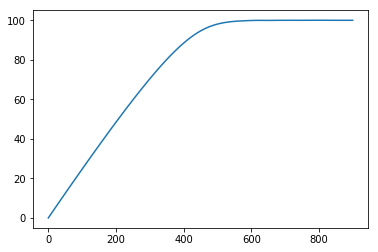

In [89]:
plt.plot(t_points, y_points)
plt.show()

In [256]:
def objective(y_real, y_model):
    return np.linalg.norm(y_real - y_model, ord=2) / y_real.shape[0]
#     y_max = max(y_real)
#     y_min = abs(min(y_real))
#     # normalize
#     y_real = (y_real - y_min)/(y_max - y_min)
#     y_model = (y_model - y_min)/(y_max - y_min)
#     return np.linalg.norm(y_real - y_model, ord=2) / y_real.shape[0] #divide by the number of elements

In [282]:
bounds = [(0., 100.), (0., 200.)]
x0 = np.array([np.random.uniform(bounds[0][0], bounds[0][1]), #k_cat
              np.random.uniform(bounds[1][0], bounds[1][1])]) #K_M

In [283]:
def fun(x, *args):
    params = args[0].copy()
    params['k_cat'] = x[0]
    params['K_M'] = x[1]
    _, y_model = solve_MichaelisMenten(params)
    return objective(args[1], y_model)


In [284]:
fun(x0, real_params, y_real)

3.1857372411170033

In [285]:
x0

array([90.01023446, 70.11494201])

In [305]:
tic = time.time()
res = opt.minimize(fun, x0, args=(real_params, y_real), method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
toc = time.time()
print(res.x, toc-tic)

(array([ 5.5, 10. ]), 0.5039629936218262)


In [306]:
tic = time.time()
res = opt.minimize(fun, x0, args=(real_params, y_real), method='powell', options={'xtol': 1e-8, 'disp': False})
toc = time.time()
print(res.x, toc-tic)

(array([ 5.5, 10. ]), 1.5187880992889404)


In [307]:
tic = time.time()
res = opt.differential_evolution(fun, bounds, args=args)
toc = time.time()
print(res.x, toc-tic)

(array([ 5.5, 10. ]), 12.346328020095825)


In [308]:
tic = time.time()
res = opt.basinhopping(fun, x0, minimizer_kwargs={'args': args})
toc = time.time()
print(res.x, toc-tic)

(array([ 5.5       , 10.00000002]), 108.61724710464478)


In [309]:
tic = time.time()
res = opt.dual_annealing(fun, bounds, args=args)
toc = time.time()
print(res.x, toc-tic)

(array([5.49999996, 9.9999996 ]), 19.70460295677185)


In [310]:
tic = time.time()
res = opt.shgo(fun, bounds, args=args)
toc = time.time()
print(res.x, toc-tic)

(array([5.49999999, 9.99999993]), 0.6706478595733643)
